<a href="https://colab.research.google.com/github/eubrunoosouza/EDA-COVID-OWID/blob/main/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

*Descreva a fonte dos seus dados e um breve resumo sobre o que se pode esperar desse dataset.*

*Fale sobre a dificuldade de se analisar uma doença novas, os conflitos existentes entre os dados dos governos federal, estaduais e os não oficiais.*

### Dicionário de Variáveis
* *Construa um dicionário de variáveis.*
    * *A descrição do nome de cada coluna pode ser encontrada [neste link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md).*

### Importando os dados do COVID-19

* Você deve entrar no site [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data) e conhecer a base dados. Usaremos o formato `csv` neste projeto.
    * Caso encontre algum problema em baixar diretamente do repositório oficial, você pode usar [este meu link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv) (atualizado até 14 de junho de 2020).
* *Importe os dados do `csv` para a variável `df`.*
    * *`pd.read_csv("endereco_do_arquivo.csv")`*

## Análise Exploratória dos Dados

*Crie uma breve contextualização sobre o que será feito na fase de Análise Exploratória de Dados...*

...

...

### Análise Exploratória Inicial

* *Visualizar as 5 primeiras entradas*
    * `df.head()`
* *Qual o tamanho do seu DataFrame*
    * `df.shape`
* *Extrair e imprimir os nomes das colunas*
    * `df.columns`
* *Quais os tipos das variáveis*
    * `df.dtypes`
* *Identifique a porcentagem de valores ausentes das colunas*
    * `df.isnull().sum() / df.shape[0]` ou
    * `(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)` *para ordem decrescente.*
* *Transforme a coluna `date` no formato `datetime`*
    * `df.date = pd.to_datetime(df.date)`
* *Ver para a data mais atual, quais os países que têm mais casos e mortes. Veja o exemplo:*
    * `df.loc[df.date == '2020-06-14'].sort_values(by="total_cases", ascending=False)`
    * `df.loc[df.date == '2020-06-14'].sort_values(by="total_deaths", ascending=False)`
* Plotar um gráfico de barras para os 5 países com mais mortes
    * `df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]`
    * `ax.bar('location', 'total_deaths', data=top5_total_deaths)`
* Plotar um gráfico de linhas para ver a evolução do total de casos de COVID-19 no mundo.
    * `df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()`
* [OPCIONAL] Plotar um gráfico de dispersão considerando `gdp_per_capita` (ou seja, o PIB dos países) pelo número total de mortos. Pegue a data mais recente apenas.
    * Lembre-se que não é nada conclusivo, pois envolve fatores como proporcão de testes, etc.


In [197]:
# importar as bibliotecas necessárias

!pip install missingno -q

%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# configurando a visualização

sns.set_style()

In [198]:
# criando um dataframe inicial

CVD19_DATA = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(CVD19_DATA, parse_dates=True, index_col='date')

In [199]:
# verificando as 5 primeiras entradas

df.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [200]:
# verificando as 5 últimas entradas

df.tail()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-02-07,ZWE,Africa,Zimbabwe,230402.0,0.0,105.143,5362.0,0.0,3.429,15266.326,0.000,6.967,355.284,0.000,0.227,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22142.0,1.467,0.0047,210.6,tests performed,7625575.0,4298467.0,3327108.0,NaN,5422.0,7885.0,50.53,28.48,22.05,NaN,522.0,3958.0,0.026,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2022-02-08,ZWE,Africa,Zimbabwe,230603.0,201.0,107.429,5366.0,4.0,2.286,15279.644,13.318,7.118,355.549,0.265,0.151,0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008365.0,133.073,NaN,15670.0,1.038,0.0069,145.9,tests performed,7631170.0,4300807.0,3330363.0,NaN,5595.0,7535.0,50.56,28.50,22.07,NaN,499.0,3736.0,0.025,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2022-02-09,ZWE,Africa,Zimbabwe,230740.0,137.0,104.000,5367.0,1.0,2.143,15288.722,9.078,6.891,355.615,0.066,0.142,0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9376.0,0.621,0.0111,90.2,tests performed,7641449.0,4306356.0,3335093.0,NaN,10279.0,6789.0,50.63,28.53,22.10,NaN,450.0,3381.0,0.022,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2022-02-10,ZWE,Africa,Zimbabwe,231040.0,300.0,124.286,5373.0,6.0,2.286,15308.599,19.878,8.235,356.012,0.398,0.151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016085.0,133.585,NaN,3081.0,0.204,0.0403,24.8,tests performed,7649832.0,4310234.0,3339598.0,NaN,8383.0,6984.0,50.69,28.56,22.13,NaN,463.0,3434.0,0.023,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2022-02-11,ZWE,Africa,Zimbabwe,231214.0,174.0,149.143,5374.0,1.0,2.429,15320.129,11.529,9.882,356.079,0.066,0.161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [201]:
# Verificando o tamanho do dataframe

print('Dimensões do Dataset',
      '\nO dataframe possui: {} entradas.'.format(df.shape[0]),
      '\nO dataframe possui: {} variáveis.'.format(df.shape[1]))

Dimensões do Dataset 
O dataframe possui: 161162 entradas. 
O dataframe possui: 66 variáveis.


Pelo `df.tail()` é possível observar que o índice da última linha é 160008, está ok em relação ao número de linhas verificado no `df.shape`.

> lembrando que o índice sempre inicia em 0.



In [202]:
# Verificando os tipos das variáveis

df.dtypes

iso_code                                    object
continent                                   object
location                                    object
total_cases                                float64
new_cases                                  float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 66, dtype: object

Pode-se observar que os tipos de dados do dataset, se resumem em floats e objects(provavelmente strings).



In [203]:
# Verificando os percentuais de valores ausentes no dataset

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

weekly_icu_admissions                      0.967827
weekly_icu_admissions_per_million          0.967827
excess_mortality_cumulative_per_million    0.965693
excess_mortality_cumulative                0.965693
excess_mortality_cumulative_absolute       0.965693
                                             ...   
new_cases                                  0.018118
total_cases                                0.017920
population                                 0.006534
location                                   0.000000
iso_code                                   0.000000
Length: 66, dtype: float64

É possível observar muitas colunas com quase 100% dos dados faltantes, iremos verificar a fundo a relevância destas colunas e prosseguir com o tratamento destes dados ausentes.

Comentário: icu = intensive care unit -> unidade de tratamento intensivo. Corresponde ao leito de internação de covid. UTI.

## Com relação às variáveis com muitos valores nulos

*   Verificar Poder preditivo
*   Relevância, se vale ou não a pena preencher os dados ausentes, ou somente descarta-los.



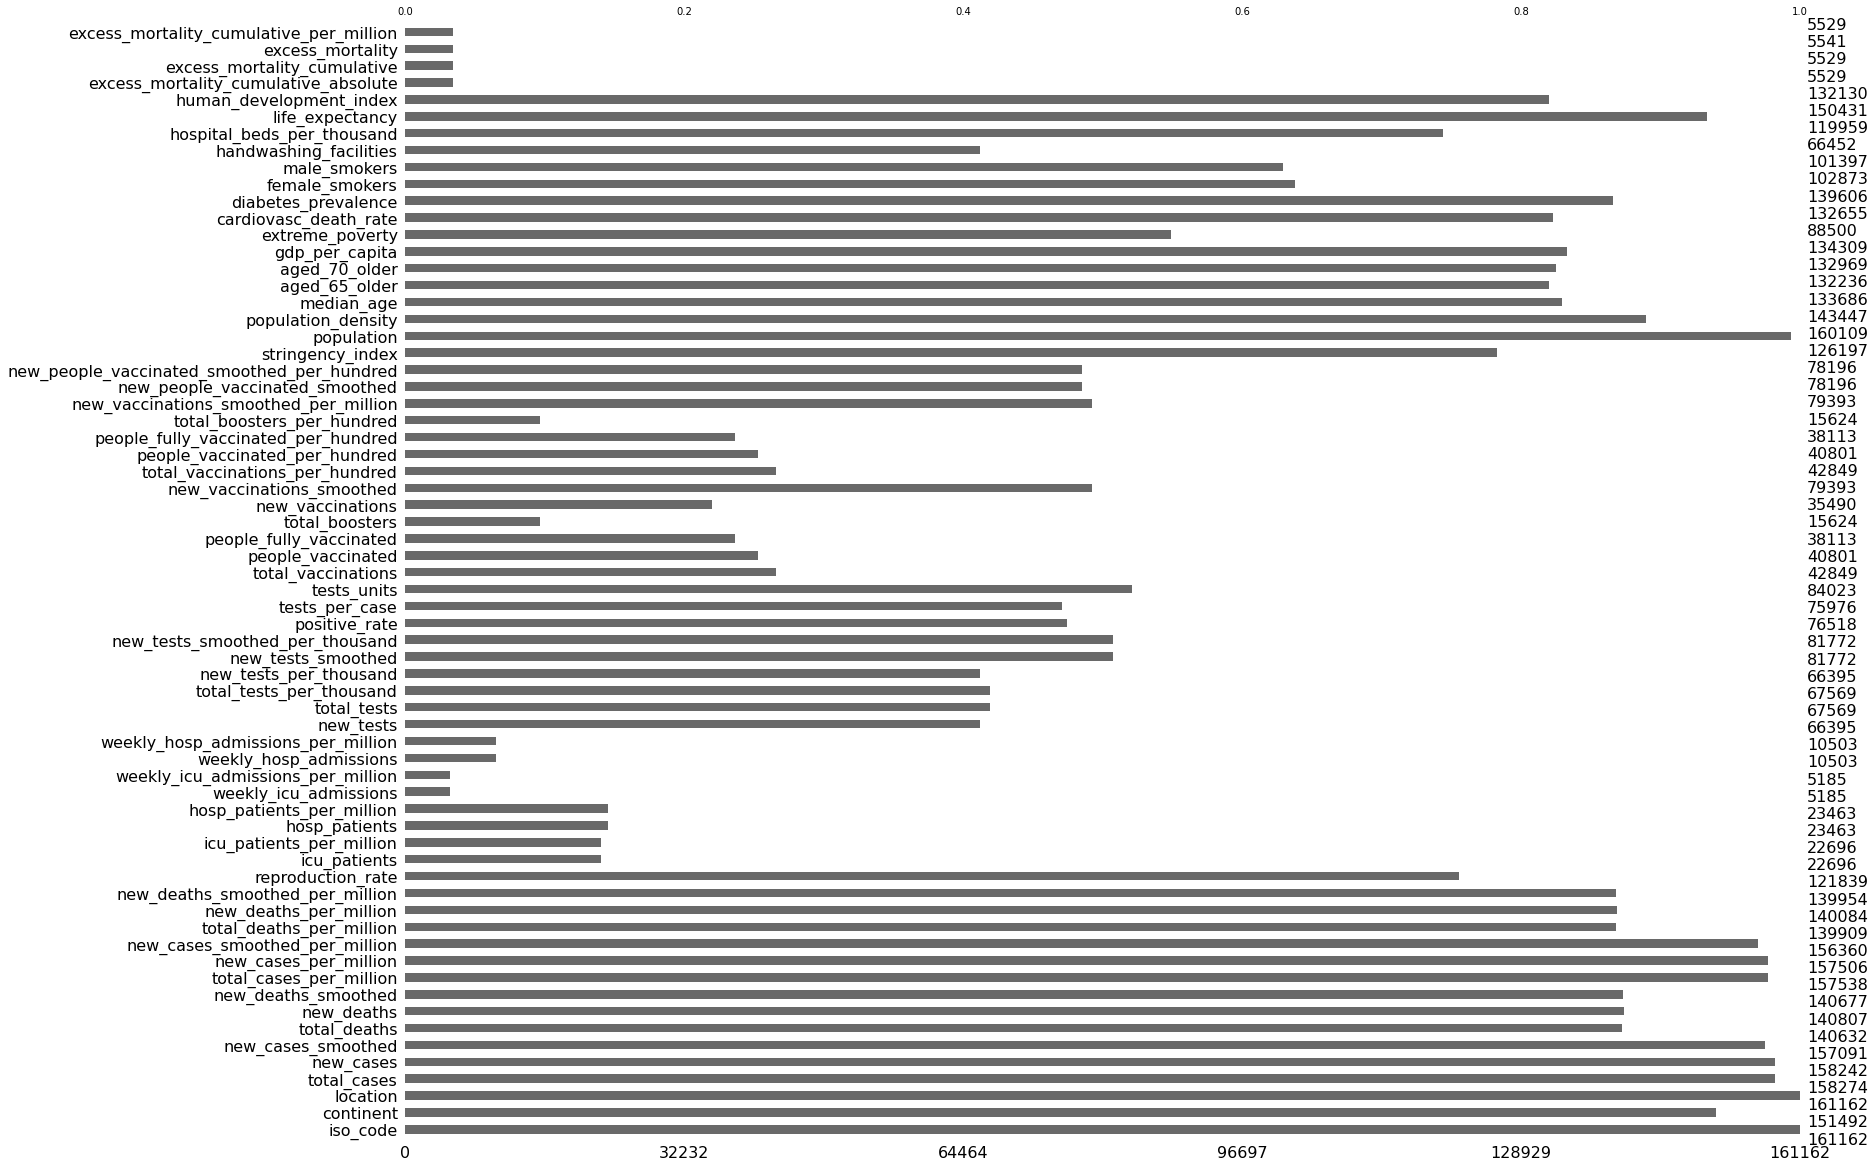

In [204]:
# visualizando dados nulos usando o missingno e gráfico de barras

msno.bar(df);

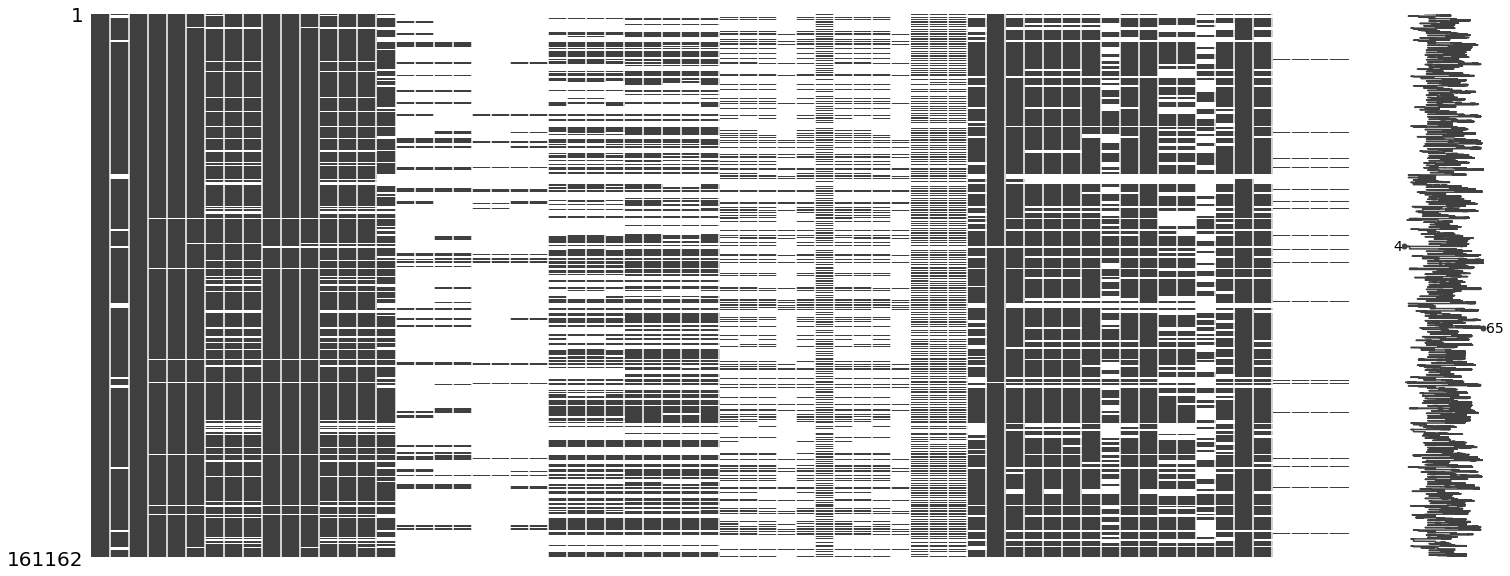

In [205]:
# Visualizando matriz de valores nulos/ausentes no dataframe

msno.matrix(df);

Comentários: 

*   Dados do dataset são diários. Entradas por dia.

*   É importante se fazer uma 'investigação' inicial para entender o porquê dos dados nulos.

*  Na coluna `new_cases_smoothed` e outras com valores nulos, é razoavel concluir que nestes dias não houveram notificações correspondentes.

*   Acredito eu que os dados relacionados aos casos devessem ser do tipo int. Estão em float. Para converter, é necessário primeiro se fazer a limpeza dos dados nulos. Depois disso devo converter os floats para os ints no dataset inteiro.

*   População também em int. Devo verificar esta informação, pois deva ser que o float possa ser melhor utilizado.

*   colocar o index como data é uma boa pedida





In [206]:
# Verificar resumo estatístico

df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.582740e+05,1.582420e+05,1.570910e+05,1.406320e+05,140807.00000,140677.000000,157538.000000,157506.000000,156360.000000,139909.000000,140084.000000,139954.000000,121839.000000,22696.000000,22696.000000,23463.000000,23463.000000,5185.000000,5185.000000,10503.000000,10503.000000,6.639500e+04,6.756900e+04,67569.000000,66395.000000,8.177200e+04,81772.000000,76518.000000,75976.000000,4.284900e+04,4.080100e+04,3.811300e+04,1.562400e+04,3.549000e+04,7.939300e+04,42849.000000,40801.000000,38113.000000,15624.000000,79393.000000,7.819600e+04,78196.000000,126197.000000,1.601090e+05,143447.000000,133686.000000,132236.000000,132969.000000,134309.000000,88500.000000,132655.000000,139606.000000,102873.000000,101397.000000,66452.000000,119959.000000,150431.000000,132130.000000,5.529000e+03,5529.000000,5541.000000,5529.000000
mean,2.363288e+06,1.091870e+04,1.078278e+04,5.577623e+04,171.03029,170.094594,26788.020265,153.023317,149.914478,488.967421,1.671089,1.657787,1.010310,913.848299,23.968475,4105.195925,160.913632,472.164706,15.574962,5988.368371,100.223532,6.647513e+04,1.626921e+07,691.447438,3.084003,5.961598e+04,2.802830,0.094751,204.349634,1.601609e+08,8.314623e+07,6.415339e+07,1.453826e+07,1.145396e+06,5.265332e+05,68.782679,36.518824,30.842008,9.867220,3393.101596,2.441800e+05,0.156031,54.759068,1.478164e+08,464.600071,30.573477,8.765348,5.536075,19654.999134,13.565425,260.018719,8.206871,10.627708,32.770306,50.787424,3.027625,73.578895,0.725693,3.679848e+04,9.220184,15.980350,922.791700
std,1.418881e+07,8.107315e+04,7.803115e+04,2.925291e+05,832.91251,810.882371,45388.688911,640.881226,482.160651,759.898882,5.166873,3.626541,0.364911,2703.127895,27.835696,11764.358830,206.174890,633.994324,16.848266,15319.977804,107.539812,2.143407e+05,6.103454e+07,1667.467054,8.598395,1.928218e+05,7.202068,0.107303,4268.995214,7.270970e+08,3.800125e+08,3.078484e+08,6.934615e+07,4.280858e+06,2.831640e+06,61.664003,28.521163,27.185221,15.088928,3979.187859,2.236999e+06,0.256244,20.517357,7.064235e+08,2145.474581,9.100816,6.146887,4.186610,20649.484708,20.014230,119.868836,4.491631,10.558908,13.518764,31.809010,2.450761,7.495365,0.149961,1.026848e+05,16.485251,30.351937,1372.453561
min,1.000000e+00,-7.493700e+04,-6.223000e+03,1.000000e+00,-1918.00000,-232.143000,0.001000,-13876.282000,-1936.106000,0.000000,-75.911000,-10.844000,-0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [207]:
# acessando célula do df

type(df.weekly_icu_admissions_per_million[0])

# valor nulo é do tipo float

numpy.float64

In [208]:
# extrair e imprimir o número das colunas

df.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vac

In [209]:
last_date = '2022-02-07'
print(last_date)

2022-02-07


# **QUANTIDADE TOTAL DE CASOS DE COVID**

In [210]:
# Primeiras 15 entradas do dataset ordenadas pelo total de casos confirmadas

df.loc[df.index == last_date].sort_values(by="total_cases", ascending=False)[:15]

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-02-07,OWID_WRL,NaN,World,397716680.0,2237791.0,2701082.143,5751861.0,10657.0,10722.429,50503.925,284.165,342.996,730.398,1.353,1.362,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.019788e+10,4.845558e+09,4.211665e+09,1.151735e+09,16543374.0,17571758.0,129.50,61.53,53.48,14.63,2231.0,4685111.0,0.059,NaN,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
2022-02-07,OWID_HIC,NaN,High income,210593531.0,1473240.0,1696902.286,2104529.0,5525.0,5006.857,173337.963,1212.613,1396.708,1732.222,4.548,4.121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.241516e+09,9.491645e+08,8.789210e+08,4.503146e+08,4173027.0,3502841.0,184.50,78.13,72.34,37.07,2883.0,351301.0,0.029,NaN,1.214930e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-07,OWID_EUR,NaN,Europe,137843415.0,1096849.0,1398873.429,1643765.0,3340.0,3184.429,184045.698,1464.490,1867.747,2194.721,4.459,4.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.215199e+09,5.038833e+08,4.763106e+08,2.635919e+08,1338880.0,1729455.0,162.25,67.28,63.60,35.19,2309.0,242397.0,0.032,NaN,7.489630e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-07,OWID_UMC,NaN,Upper middle income,107388103.0,528556.0,712840.286,2362082.0,3046.0,3720.571,42721.592,210.272,283.585,939.694,1.212,1.480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.571304e+09,2.003428e+09,1.879808e+09,6.356759e+08,6412796.0,5102834.0,181.86,79.70,74.78,25.29,2030.0,882760.0,0.035,NaN,2.513673e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-07,OWID_ASI,NaN,Asia,105194947.0,563095.0,631192.000,1312025.0,2343.0,2127.714,22485.024,120.359,134.915,280.440,0.501,0.455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.912206e+09,3.323112e+09,2.895768e+09,6.534724e+08,9547087.0,10705884.0,147.75,71.03,61.90,13.97,2288.0,2777988.0,0.059,NaN,4.678445e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-07,OWID_EUN,NaN,European Union,94716374.0,721820.0,1042864.000,969519.0,2292.0,1923.857,211803.466,1614.124,2332.038,2168.025,5.125,4.302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.323247e+08,3.336844e+08,3.194595e+08,2.054829e+08,1134104.0,1336849.0,186.12,74.62,71.44,45.95,2989.0,114615.0,0.026,NaN,4.471899e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [211]:
# Quantidade total de casos de covid no mundo todo

cvd19_all_cases = int(df.loc[df.index == last_date, 
                         'total_cases'].sort_values(ascending=False)[0])

print('O número total de casos de COVID-19 no mundo todo é igual a: {:,} casos.'
      .format(cvd19_all_cases))

O número total de casos de COVID-19 no mundo todo é igual a: 397,716,680 casos.


# **QUANTIDADE TOTAL DE MORTES POR COVID**

In [212]:
# Primeiras 15 entradas do dataset ordenadas pelo total de mortes confirmadas

df.loc[df.index == last_date].sort_values(by="total_deaths", ascending=False)[:15]

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-02-07,OWID_WRL,NaN,World,397716680.0,2237791.0,2701082.143,5751861.0,10657.0,10722.429,50503.925,284.165,342.996,730.398,1.353,1.362,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.019788e+10,4.845558e+09,4.211665e+09,1.151735e+09,16543374.0,17571758.0,129.50,61.53,53.48,14.63,2231.0,4685111.0,0.059,NaN,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN,NaN,NaN,NaN
2022-02-07,OWID_UMC,NaN,Upper middle income,107388103.0,528556.0,712840.286,2362082.0,3046.0,3720.571,42721.592,210.272,283.585,939.694,1.212,1.480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.571304e+09,2.003428e+09,1.879808e+09,6.356759e+08,6412796.0,5102834.0,181.86,79.70,74.78,25.29,2030.0,882760.0,0.035,NaN,2.513673e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-07,OWID_HIC,NaN,High income,210593531.0,1473240.0,1696902.286,2104529.0,5525.0,5006.857,173337.963,1212.613,1396.708,1732.222,4.548,4.121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.241516e+09,9.491645e+08,8.789210e+08,4.503146e+08,4173027.0,3502841.0,184.50,78.13,72.34,37.07,2883.0,351301.0,0.029,NaN,1.214930e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-07,OWID_EUR,NaN,Europe,137843415.0,1096849.0,1398873.429,1643765.0,3340.0,3184.429,184045.698,1464.490,1867.747,2194.721,4.459,4.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.215199e+09,5.038833e+08,4.763106e+08,2.635919e+08,1338880.0,1729455.0,162.25,67.28,63.60,35.19,2309.0,242397.0,0.032,NaN,7.489630e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-07,OWID_NAM,NaN,North America,90102427.0,381715.0,331801.000,1320650.0,3348.0,3313.857,151031.267,639.837,556.171,2213.697,5.612,5.555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.075151e+08,4.175721e+08,3.626438e+08,1.202050e+08,921933.0,1407089.0,152.12,69.99,60.79,20.15,2359.0,219809.0,0.037,NaN,5.965813e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-07,OWID_ASI,NaN,Asia,105194947.0,563095.0,631192.000,1312025.0,2343.0,2127.714,22485.024,120.359,134.915,280.440,0.501,0.455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.912206e+09,3.323112e+09,2.895768e+09,6.534724e+08,9547087.0,10705884.0,147.75,71.03,61.90,13.97,2288.0,2777988.0,0.059,NaN,4.678445e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [213]:
# Quantidade total de casos de mortes por covid no mundo todo

cvd19_all_deaths = int(df.loc[df.index == last_date, 
                         'total_deaths'].sort_values(ascending=False)[0])

print('O número total de mortes por COVID-19 no mundo todo é igual a: {:,} mortes.'
      .format(cvd19_all_deaths))

O número total de mortes por COVID-19 no mundo todo é igual a: 5,751,861 mortes.


In [214]:
# criando um dataframe somente com os países

df_countries = df.dropna(subset=['continent']).copy()

# verificando 5 primeiras entradas

df_countries.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


## ***TOP 6 PAÍSES COM MAIS CASOS DE COVID-19 NO MUNDO***

In [215]:
# Primeiras 6 entradas deste dataset somente com os países

df_countries.loc[df_countries.index == last_date].sort_values(
                 by="total_cases", ascending=False)[:6]

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-02-07,USA,North America,United States,76861658.0,338779.0,269910.286,906330.0,2920.0,2553.571,230874.670,1017.614,810.748,2722.406,8.771,7.670,0.56,18977.0,57.003,97228.0,292.050,NaN,NaN,91370.0,274.454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.452315e+08,251566115.0,212565165.0,90632126.0,421138.0,452682.0,164.22,75.77,64.02,27.30,1363.0,116939.0,0.035,NaN,3.329151e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2022-02-07,IND,Asia,India,42339611.0,67597.0,124301.714,504062.0,1188.0,1117.143,30385.630,48.512,89.207,361.747,0.853,0.802,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1374446.0,741561587.0,532.192,0.986,1794825.0,1.288,0.0693,14.4,samples tested,1.696048e+09,951263816.0,730627102.0,14157126.0,161848.0,4466001.0,121.72,68.27,52.43,1.02,3205.0,1176586.0,0.084,81.94,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2022-02-07,BRA,South America,Brazil,26616014.0,69615.0,164640.571,632946.0,432.0,765.286,124377.709,325.314,769.372,2957.782,2.019,3.576,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70143.0,0.328,NaN,NaN,tests performed,3.706599e+08,172652514.0,150995915.0,52053080.0,1138791.0,1165236.0,173.21,80.68,70.56,24.32,5445.0,332913.0,0.156,NaN,2.139934e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
2022-02-07,FRA,Europe,France,20856322.0,46001.0,237131.857,132990.0,417.0,282.714,309340.008,682.285,3517.129,1972.502,6.185,4.193,0.73,3622.0,53.721,33447.0,496.084,2191.0,32.497,19819.0,293.954,854425.0,239907749.0,3558.301,12.673,722823.0,10.721,0.3170,3.2,people tested,1.381780e+08,53854213.0,51782616.0,33616336.0,202400.0,203791.0,204.95,79.88,76.80,49.86,3023.0,9545.0,0.014,69.44,6.742200e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
2022-02-07,GBR,Europe,United Kingdom,17911386.0,64322.0,79063.000,158498.0,45.0,212.857,262602.901,943.039,1159.161,2323.775,0.660,3.121,0.77,443.0,6.495,13888.0,203.615,NaN,NaN,9998.0,146.583,1211277.0,447192998.0,6556.398,17.759,1175783.0,17.238,0.0672,14.9,tests performed,1.386508e+08,52447403.0,48617355.0,37586043.0,65594.0,72494.0,203.28,76.89,71.28,55.11,1063.0,12417.0,0.018,NaN,6.820711e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
2022-02-07,RUS,Europe,Russia,12782791.0,170532.0,158917.857,329264.0,600.0,656.000,87606.154,1168.732,1089.135,2256.593,4

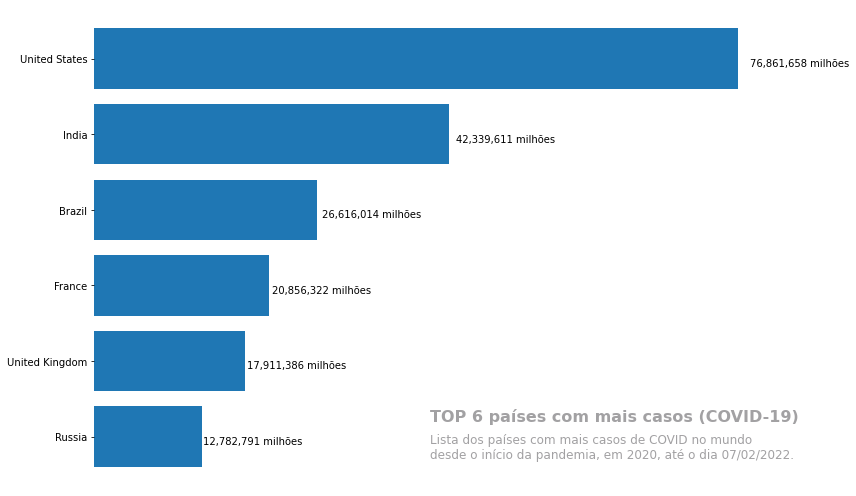

In [216]:
# PLOTANDO UM GRÁFICO DOS TOP 6 PAÍSES COM MAIS CASOS

top_6_total_cases = df_countries.loc[df_countries.index == last_date, 
                                    ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[:6]


fig, ax = plt.subplots(figsize=(12, 7))
n_plots = 10
palette = sns.color_palette("coolwarm", n_colors=n_plots)


ax.barh('location', 'total_cases', data=top_6_total_cases)

ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_ylabel('')
ax.set_xlabel('')
ax.ticklabel_format(axis='x', style='plain')

plt.text(40000000,4.8, 'TOP 6 países com mais casos (COVID-19)',
          fontsize=16, 
          color="#A2A1A3",
          weight='bold')

plt.text(40000000,4.95, 'Lista dos países com mais casos de COVID no mundo\n'
                          'desde o início da pandemia, em 2020, até o dia 07/02/2022.',
          fontsize=12,
          verticalalignment="top", 
          color="#A2A1A3")

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 

i=0

for p in ax.patches:
    ax.text(p.get_width()+(p.get_width()/55),i+p.get_height()/8,'{:,} milhões'.format(int(p.get_width())))
    i+=1

plt.xticks([])
plt.tight_layout()

plt.show()

## ***TOP 6 PAÍSES COM MAIS MORTES POR COVID-19 NO MUNDO***

In [217]:
# Visualizando os 6 países com mais mortes no mundo

df_countries.loc[df_countries.index == last_date].sort_values(
                 by="total_deaths", ascending=False)[:6]

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-02-07,USA,North America,United States,76861658.0,338779.0,269910.286,906330.0,2920.0,2553.571,230874.670,1017.614,810.748,2722.406,8.771,7.670,0.56,18977.0,57.003,97228.0,292.05,NaN,NaN,91370.0,274.454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.452315e+08,251566115.0,212565165.0,90632126.0,421138.0,452682.0,164.22,75.77,64.02,27.30,1363.0,116939.0,0.035,NaN,3.329151e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2022-02-07,BRA,South America,Brazil,26616014.0,69615.0,164640.571,632946.0,432.0,765.286,124377.709,325.314,769.372,2957.782,2.019,3.576,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70143.0,0.328,NaN,NaN,tests performed,3.706599e+08,172652514.0,150995915.0,52053080.0,1138791.0,1165236.0,173.21,80.68,70.56,24.32,5445.0,332913.0,0.156,NaN,2.139934e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
2022-02-07,IND,Asia,India,42339611.0,67597.0,124301.714,504062.0,1188.0,1117.143,30385.630,48.512,89.207,361.747,0.853,0.802,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1374446.0,741561587.0,532.192,0.986,1794825.0,1.288,0.0693,14.4,samples tested,1.696048e+09,951263816.0,730627102.0,14157126.0,161848.0,4466001.0,121.72,68.27,52.43,1.02,3205.0,1176586.0,0.084,81.94,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2022-02-07,RUS,Europe,Russia,12782791.0,170532.0,158917.857,329264.0,600.0,656.000,87606.154,1168.732,1089.135,2256.593,4.112,4.496,1.41,NaN,NaN,NaN,NaN,NaN,NaN,111902.0,766.914,NaN,263153282.0,1803.507,NaN,998577.0,6.844,0.1591,6.3,tests performed,1.557776e+08,77197417.0,70341815.0,10373281.0,34322.0,200506.0,106.76,52.91,48.21,7.11,1374.0,87444.0,0.060,NaN,1.459120e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
2022-02-07,MEX,North America,Mexico,5160767.0,9242.0,31168.143,309752.0,206.0,523.000,39618.295,70.949,239.272,2377.911,1.581,4.015,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7906.0,13867995.0,106.462,0.061,19085.0,0.147,0.5860,1.7,people tested,1.696813e+08,83903511.0,77614361.0,NaN,53402.0,561566.0,130.26,64.41,59.58,NaN,4311.0,40420.0,0.031,NaN,1.302622e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
2022-02-07,PER,South America,Peru,3363489.0,0.0,19869.000,206984.0,0.0,211.286,100825.779,0.000,595.604,6204.665,0.000,6.334,1.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

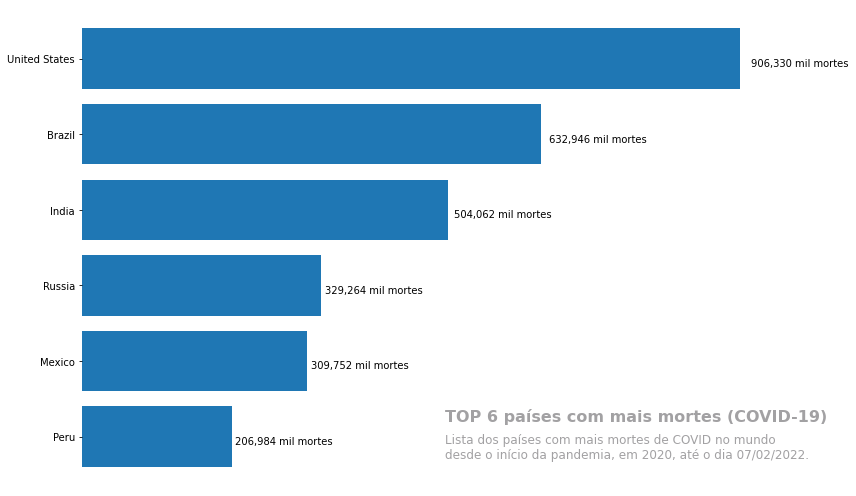

In [218]:
# PLOTANDO UM GRÁFICO DOS TOP 6 PAÍSES COM MAIS MORTES

top_6_total_deaths = df_countries.loc[df_countries.index == last_date, 
                                    ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[:6]


fig, ax = plt.subplots(figsize=(12, 7))
n_plots = 10
palette = sns.color_palette("coolwarm", n_colors=n_plots)



ax.barh('location', 'total_deaths', data=top_6_total_deaths)

ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_ylabel('')
ax.set_xlabel('')
ax.ticklabel_format(axis='x', style='plain')

plt.text(500000,4.8, 'TOP 6 países com mais mortes (COVID-19)',
          fontsize=16, 
          color="#A2A1A3",
          weight='bold')

plt.text(500000,4.95, 'Lista dos países com mais mortes de COVID no mundo\n'
                          'desde o início da pandemia, em 2020, até o dia 07/02/2022.',
          fontsize=12,
          verticalalignment="top", 
          color="#A2A1A3")

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=False) 

i=0

for p in ax.patches:
    ax.text(p.get_width()+(p.get_width()/55),i+p.get_height()/8,'{:,} mil mortes'.format(int(p.get_width())))
    i+=1

plt.xticks([])
plt.tight_layout()

plt.show()

## ***Como o vírus tem progredido no mundo***


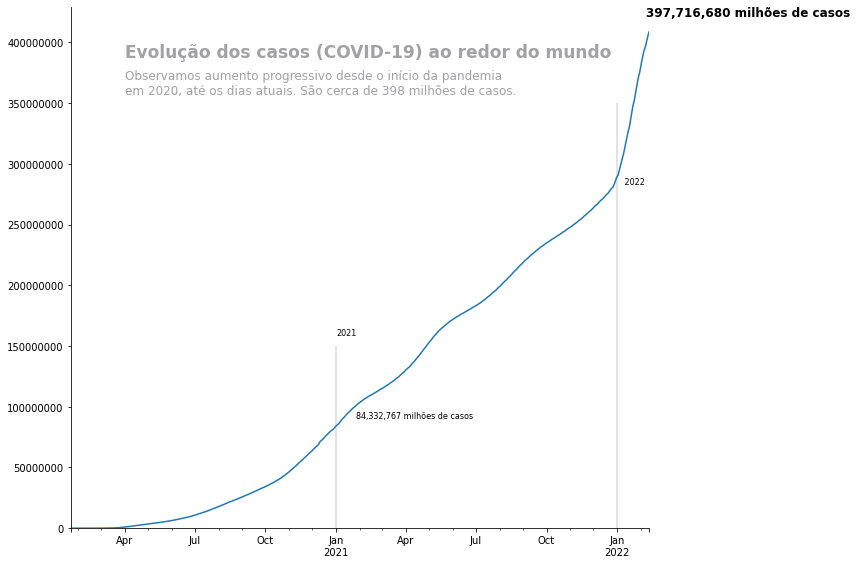

In [219]:
# verificando a evolução dos casos no mundo todo pelo vírus

covid_evolution = df.loc[df.location == 'World', 'total_cases']
cvd19_2021 = df.loc[df.index == '01-01-2021', 'total_cases'].sort_values(ascending=False)[0]

fig, ax = plt.subplots(figsize=(12, 8))

covid_evolution.plot()

ax.set_ylim(ymin=0)
ax.set_xlabel('')
ax.ticklabel_format(axis='y', style='plain')


plt.text('2020-04-01',388000000, 'Evolução dos casos (COVID-19) ao redor do mundo ',
         fontsize=17, 
         color="#A2A1A3",
         weight='bold')

plt.text('2020-04-01',378000000, 'Observamos aumento progressivo desde o início da pandemia\n' 
          'em 2020, até os dias atuais. São cerca de 398 milhões de casos. '
          '',
          fontsize=12,
          verticalalignment="top", 
          color="#A2A1A3")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.annotate("{:,} milhões de casos\n".format(cvd19_all_cases), (last_date, 409000000), 
             fontsize=12, weight='bold')

plt.vlines(x = '01-01-2021', ymin = 0, ymax = 150000000,
           colors = '#dbdbdb',
           label = 'vline_multiple - full height')

plt.annotate("2021\n", ('01-01-2021', 150000000), fontsize=8)
plt.annotate("        {:,} milhões de casos\n".format(int(cvd19_2021)), 
             ('01-01-2021', 82000000), fontsize=8)

plt.vlines(x = '01-01-2022', ymin = 0, ymax = 350000000,
           colors = '#dbdbdb',
           label = 'vline_multiple - full height')

plt.annotate("   2022\n", ('01-01-2022', 275000000), fontsize=8)

plt.tight_layout()

plt.show()

EVOLUÇÃO DOS CASOS A PARTIR DO SURGIMENTO DAS VARIANTES DA COVID-19

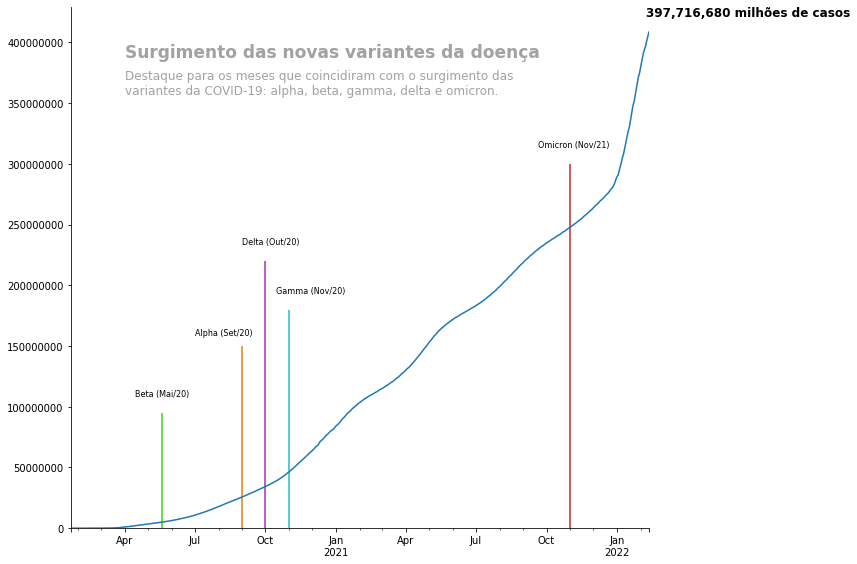

In [220]:
covid_evolution = df.loc[df.location == 'World', 'total_cases']
cvd19_2021 = df.loc[df.index == '01-01-2021', 'total_cases'].sort_values(ascending=False)[0]

fig, ax = plt.subplots(figsize=(12, 8))

covid_evolution.plot()

ax.set_ylim(ymin=0)
ax.set_xlabel('')
ax.ticklabel_format(axis='y', style='plain')


plt.text('2020-04-01',388000000, 'Surgimento das novas variantes da doença',
         fontsize=17, 
         color="#A2A1A3",
         weight='bold')

plt.text('2020-04-01',378000000, 'Destaque para os meses que coincidiram com o surgimento das \n' 
          'variantes da COVID-19: alpha, beta, gamma, delta e omicron. '
          '',
          fontsize=12,
          verticalalignment="top", 
          color="#A2A1A3")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.annotate("{:,} milhões de casos\n".format(cvd19_all_cases), (last_date, 409000000), 
             fontsize=12, weight='bold')

# alpha variant

plt.vlines(x = '2020-09-01', ymin = 0, ymax = 150000000,
           colors = '#e37e0b',
           label = 'vline_multiple - full height')

plt.annotate("Alpha (Set/20)\n", ('2020-07-01', 150000000), fontsize=8)

# beta variant

plt.vlines(x = '2020-05-20', ymin = 0, ymax = 95000000,
           colors = '#41cf21',
           label = 'vline_multiple - full height')

plt.annotate("Beta (Mai/20)\n", ('2020-04-15', 100000000), fontsize=8)

# gamma variant

plt.vlines(x = '2020-11-01', ymin = 0, ymax = 180000000,
           colors = '#21bacf',
           label = 'vline_multiple - full height')

plt.annotate("Gamma (Nov/20)\n", ('2020-10-15', 185000000), fontsize=8)

# delta variant

plt.vlines(x = '2020-10-01', ymin = 0, ymax = 220000000,
           colors = '#a92bba',
           label = 'vline_multiple - full height')

plt.annotate("Delta (Out/20)\n", ('2020-09-01', 225000000), fontsize=8)

# omicron variant

plt.vlines(x = '2021-11-01', ymin = 0, ymax = 300000000,
           colors = '#ba2b2b',
           label = 'vline_multiple - full height')

plt.annotate("Omicron (Nov/21)\n", ('2021-09-20', 305000000), fontsize=8)

plt.tight_layout()

plt.show()

## ***Evolução das mortes no mundo todo***


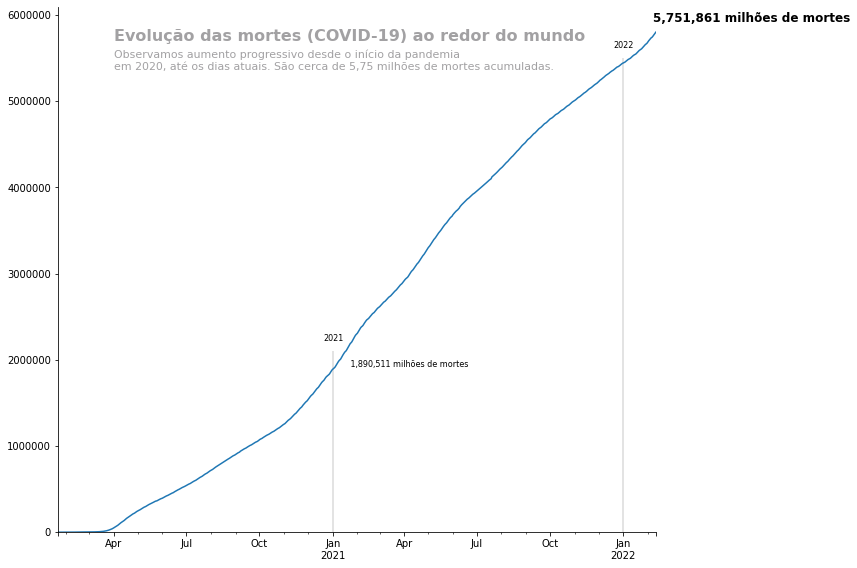

In [221]:
# verificando a evolução das mortes no mundo todo pelo vírus

covid_death_evolution = df.loc[df.location == 'World', 'total_deaths']
cvd19_dt2021 = df.loc[df.index == '01-01-2021', 'total_deaths'].sort_values(ascending=False)[0]

fig, ax = plt.subplots(figsize=(12, 8))

covid_death_evolution.plot()

ax.set_ylim(ymin=0)
ax.set_xlabel('')
ax.ticklabel_format(axis='y', style='plain')


plt.text('2020-04-01', 5700000, 'Evolução das mortes (COVID-19) ao redor do mundo ',
         fontsize=16, 
         color="#A2A1A3",
         weight='bold')

plt.text('2020-04-01',5600000, 'Observamos aumento progressivo desde o início da pandemia\n' 
          'em 2020, até os dias atuais. São cerca de 5,75 milhões de mortes acumuladas. '
          '',
          fontsize=11,
          verticalalignment="top", 
          color="#A2A1A3")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.annotate("{:,} milhões de mortes\n".format(cvd19_all_deaths), (last_date, cvd19_all_deaths), 
             fontsize=12, weight='bold')

plt.vlines(x = '01-01-2021', ymin = 0, ymax = 2100000,
           colors = '#dbdbdb',
           label = 'vline_multiple - full height')

plt.annotate("2021\n", ('20-12-2020', 2100000), fontsize=8)
plt.annotate("       {:,} milhões de mortes\n".format(int(cvd19_dt2021)), 
             ('01-01-2021', 1800000), fontsize=8)

plt.vlines(x = '01-01-2022', ymin = 0, ymax = 5500000,
           colors = '#dbdbdb',
           label = 'vline_multiple - full height')

plt.annotate("2022\n", ('20-12-2021', 5500000), fontsize=8)

plt.tight_layout()

plt.show()

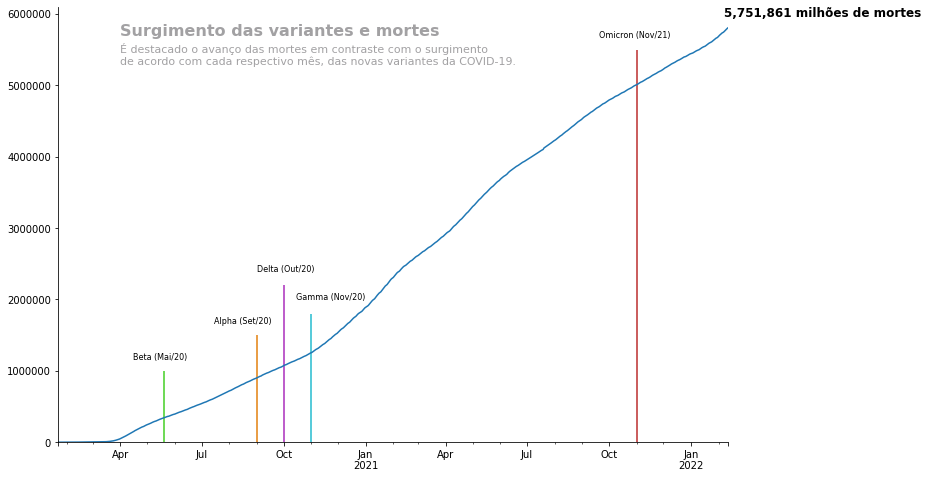

In [222]:
# verificando a evolução das mortes no mundo todo pelo vírus
# surgimento das variantes

covid_death_evolution = df.loc[df.location == 'World', 'total_deaths']
cvd19_dt2021 = df.loc[df.index == '01-01-2021', 'total_deaths'].sort_values(ascending=False)[0]

fig, ax = plt.subplots(figsize=(12, 8))

covid_death_evolution.plot()

ax.set_ylim(ymin=0)
ax.set_xlabel('')
ax.ticklabel_format(axis='y', style='plain')


plt.text('2020-04-01', 5700000, 'Surgimento das variantes e mortes ',
         fontsize=16, 
         color="#A2A1A3",
         weight='bold')

plt.text('2020-04-01',5600000, 'É destacado o avanço das mortes em contraste com o surgimento\n' 
          'de acordo com cada respectivo mês, das novas variantes da COVID-19. '
          '',
          fontsize=11,
          verticalalignment="top", 
          color="#A2A1A3")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.annotate("{:,} milhões de mortes\n".format(cvd19_all_deaths), (last_date, cvd19_all_deaths), 
             fontsize=12, weight='bold')

# alpha variant

plt.vlines(x = '2020-09-01', ymin = 0, ymax = 1500000,
           colors = '#e37e0b',
           label = 'vline_multiple - full height')

plt.annotate("Alpha (Set/20)\n", ('2020-07-15', 1520000), fontsize=8)

# beta variant

plt.vlines(x = '2020-05-20', ymin = 0, ymax = 1000000,
           colors = '#41cf21',
           label = 'vline_multiple - full height')

plt.annotate("Beta (Mai/20)\n", ('2020-04-15', 1020000), fontsize=8)

# gamma variant

plt.vlines(x = '2020-11-01', ymin = 0, ymax = 1800000,
           colors = '#21bacf',
           label = 'vline_multiple - full height')

plt.annotate("Gamma (Nov/20)\n", ('2020-10-15', 1850000), fontsize=8)

# delta variant

plt.vlines(x = '2020-10-01', ymin = 0, ymax = 2200000,
           colors = '#a92bba',
           label = 'vline_multiple - full height')

plt.annotate("Delta (Out/20)\n", ('2020-09-01', 2250000), fontsize=8)

# omicron variant

plt.vlines(x = '2021-11-01', ymin = 0, ymax = 5500000,
           colors = '#ba2b2b',
           label = 'vline_multiple - full height')

plt.annotate("Omicron (Nov/21)\n", ('2021-09-20', 5520000), fontsize=8)

plt.show()

In [223]:
# criando gráfico de dispersão (casos x PIB)
# criando novo dataframe somente com os dados do PIB x casos de COVID

df_PIB_cases = df_countries.loc[df_countries.index == last_date, 
                                 ['gdp_per_capita', 'total_cases']].copy()

df_PIB_cases.head()

,gdp_per_capita,total_cases
date,,
2022-02-07,1803.987,166924.0
2022-02-07,11803.431,264875.0
2022-02-07,13913.839,258478.0
2022-02-07,NaN,36808.0
2022-02-07,5819.495,98409.0


In [224]:
df_PIB_cases.tail()

,gdp_per_capita,total_cases
date,,
2022-02-07,6171.884,2358786.0
2022-02-07,NaN,454.0
2022-02-07,1479.147,11266.0
2022-02-07,3689.251,307317.0
2022-02-07,1899.775,230402.0


In [225]:
# verificando valores ausentes na coluna do PIB dos países

print('Quantidade de dados nulos por coluna\n')
display(df_PIB_cases.isnull().sum())

print('\nEste recorte do dataframe possui: {} linhas e {} colunas.'.format(df_PIB_cases.shape[0],
                                                                 df_PIB_cases.shape[1]))

Quantidade de dados nulos por coluna



gdp_per_capita    26
total_cases        1
dtype: int64


Este recorte do dataframe possui: 216 linhas e 2 colunas.


In [226]:
# excluindo dados nulos para plotagem de gráfico de dispersão

df_PIB_cases.dropna(axis=0, inplace=True)

In [227]:
# verificando o dataframe após limpeza de dados nulos

df_PIB_cases.isnull().sum()

gdp_per_capita    0
total_cases       0
dtype: int64

In [228]:
# olhando a cara do dataset limpo

df_PIB_cases.head()

,gdp_per_capita,total_cases
date,,
2022-02-07,1803.987,166924.0
2022-02-07,11803.431,264875.0
2022-02-07,13913.839,258478.0
2022-02-07,5819.495,98409.0
2022-02-07,21490.943,6853.0


<Figure size 432x288 with 0 Axes>

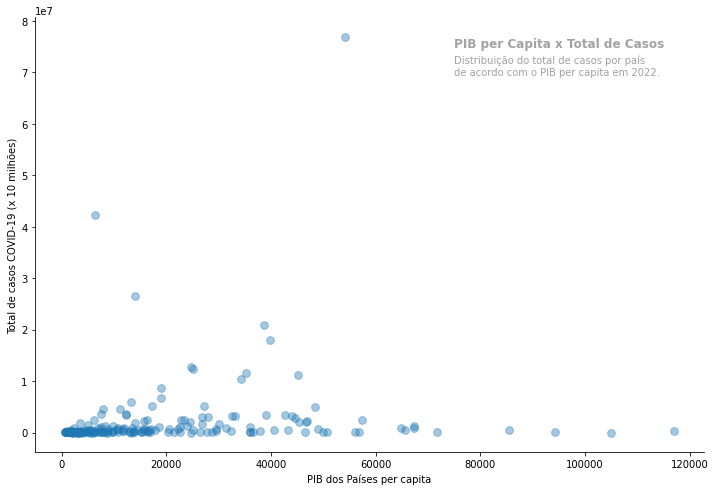

In [229]:
# plotando gráfico de dispersão PIB x casos totais de covid

fig, ax = plt.subplots(0);

ax = df_PIB_cases.plot(kind='scatter', x='gdp_per_capita', y='total_cases',
                  alpha=0.4, s=60, figsize=(12, 8));

plt.xlabel('PIB dos Países per capita');
plt.ylabel('Total de casos COVID-19 (x 10 milhões)');

plt.text(75000, 75000000, 'PIB per Capita x Total de Casos ',
         fontsize=12, 
         color="#A2A1A3",
         weight='bold');

plt.text(75000, 69500000, 'Distribuição do total de casos por país\n'
          'de acordo com o PIB per capita em 2022.',
         fontsize=10, 
         color="#A2A1A3");

ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False);

### Análise Exploratória para o Brasil

* Criar uma cópia do DataFrame apenas com o Brasil
    * `df_brasil = df.loc[df.location == "Brazil"].copy()`
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

In [230]:
# criando um dataframe somente com os dados do Brasil

df_brazil = df.loc[df['location'] == 'Brazil'].copy()

# verificando as 5 primeiras entradas

df_brazil.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,BRA,South America,Brazil,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2020-02-27,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2020-02-28,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2020-02-29,BRA,South America,Brazil,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
2020-03-01,BRA,South America,Brazil,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


In [231]:
# data da primeira notificação do Brasil

df_brazil.index[0]

Timestamp('2020-02-26 00:00:00')

In [232]:
# última data de notificação do Brasil

df_brazil.index.max()

Timestamp('2022-02-11 00:00:00')

In [233]:
# limpeza de dados nulos em new deaths

df_brazil_deaths = df_brazil.loc[df_brazil['new_deaths'] != 0.0].copy()
df_brazil_deaths.dropna(subset=['new_deaths'], axis=0, inplace=True)

# notificação da primeira morte

df_brazil_deaths.loc[df_brazil['new_deaths'] != 0.0].head(1)


,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-17,BRA,South America,Brazil,321.0,121.0,41.429,1.0,1.0,0.143,1.5,0.565,0.194,0.005,0.005,0.001,2.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.87,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


In [234]:
print('A primeira morte foi registrada no Brasil em {}'.format(df_brazil_deaths.index.min()))

A primeira morte foi registrada no Brasil em 2020-03-17 00:00:00


In [235]:
# Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
# calculando tempo desde o primeiro caso até a primeira morte

from datetime import date

delta = df_brazil_deaths.index.min() - df_brazil.index.min()
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(delta.days))

Se passaram 20 dias entre o primeiro caso e a primeira morte no Brasil.


In [236]:
# quantos dias desde a primeira morte?

delta2 = df_brazil_deaths.index.max() - df_brazil_deaths.index.min()
print('Se passaram {} dias entre a primeira morte registrada até os dias de hoje.'.format(delta2.days))

Se passaram 696 dias entre a primeira morte registrada até os dias de hoje.


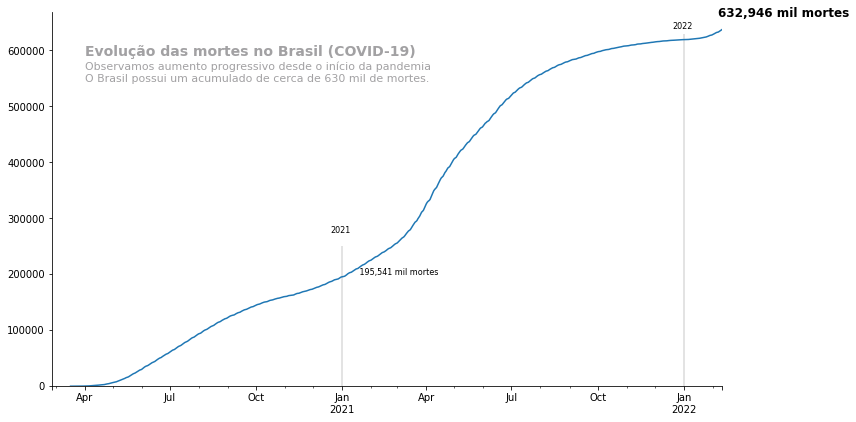

In [237]:
# verificando a evolução das mortes no mundo todo pelo vírus

covid_death_evolution_brazil = df.loc[df.location == 'Brazil', 'total_deaths']

cvd19_all_deaths_brazil = int(df_brazil.loc[df_brazil.index == last_date, 
                         'total_deaths'].sort_values(ascending=False)[0])

cvd19_dt2021_brazil = df_brazil.loc[df_brazil.index == '01-01-2021', 
                                    'total_deaths'].sort_values(ascending=False)[0]

fig, ax = plt.subplots(figsize=(12, 6))

covid_death_evolution_brazil.plot()

ax.set_ylim(ymin=0)
ax.set_xlabel('')
ax.ticklabel_format(axis='y', style='plain')


plt.text('2020-04-01', 590000, 'Evolução das mortes no Brasil (COVID-19) ',
         fontsize=14, 
         color="#A2A1A3",
         weight='bold')

plt.text('2020-04-01', 580000, 'Observamos aumento progressivo desde o início da pandemia\n' 
          'O Brasil possui um acumulado de cerca de 630 mil de mortes. '
          '',
          fontsize=11,
          verticalalignment="top", 
          color="#A2A1A3")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.annotate("{:,} mil mortes\n".format(cvd19_all_deaths_brazil), 
             (last_date, cvd19_all_deaths_brazil), fontsize=12, weight='bold');

plt.vlines(x = '01-01-2021', ymin = 0, ymax = 250000,
           colors = '#dbdbdb',
           label = 'vline_multiple - full height')

plt.annotate("2021\n", ('20-12-2020', 255000), fontsize=8)
plt.annotate("       {:,} mil mortes\n".format(int(cvd19_dt2021_brazil)), 
             ('01-01-2021', 180000), fontsize=8)

plt.vlines(x = '01-01-2022', ymin = 0, ymax = 630000,
           colors = '#dbdbdb',
           label = 'vline_multiple - full height')

plt.annotate("2022\n", ('20-12-2021', 620000), fontsize=8)

plt.tight_layout()

plt.show()


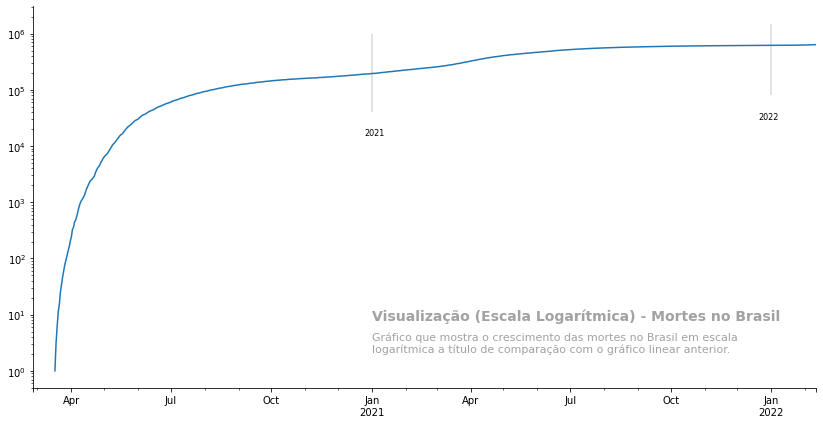

In [238]:
# grafico em escala logaritímica mortes

covid_death_evolution_brazil = df.loc[df.location == 'Brazil', 'total_deaths']

cvd19_all_deaths_brazil = int(df_brazil.loc[df_brazil.index == last_date, 
                         'total_deaths'].sort_values(ascending=False)[0])

cvd19_dt2021_brazil = df_brazil.loc[df_brazil.index == '01-01-2021', 
                                    'total_deaths'].sort_values(ascending=False)[0]

fig, ax = plt.subplots(figsize=(12, 6))

covid_death_evolution_brazil.plot()

ax.set_yscale('log')
ax.set_xlabel('')

plt.text('2021-01-01', 8, 'Visualização (Escala Logarítmica) - Mortes no Brasil ',
         fontsize=14, 
         color="#A2A1A3",
         weight='bold')

plt.text('2021-01-01', 5, 'Gráfico que mostra o crescimento das mortes no Brasil em escala \n' 
          'logarítmica a título de comparação com o gráfico linear anterior. '
          '',
          fontsize=11,
          verticalalignment="top", 
          color="#A2A1A3")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.vlines(x = '01-01-2021', ymin = 40000, ymax = 1000000,
           colors = '#dbdbdb',
           label = 'vline_multiple - full height')

plt.annotate("2021\n", ('25-12-2020', 10000), fontsize=8)

plt.vlines(x = '01-01-2022', ymin = 80000, ymax = 1500000,
           colors = '#dbdbdb',
           label = 'vline_multiple - full height')

plt.annotate("2022\n", ('20-12-2021', 20000), fontsize=8)


plt.tight_layout()

plt.show()


In [239]:
# ANÁLISE DE DADOS DO SUS

SUS_DATA_CVD19 = 'https://raw.githubusercontent.com/eubrunoosouza/EDA-COVID-OWID/main/HIST_PAINEL_COVIDBR_2022_Parte1_11fev2022.csv'

df_sus_brazil = pd.read_csv(SUS_DATA_CVD19, sep=';')

# ver primeiras 5 entradas

df_sus_brazil.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-01,52,210147125.0,22291507.0,3986,619105,49,21581668.0,90734.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-02,1,210147125.0,22293228.0,1721,619133,28,21581717.0,92378.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-03,1,210147125.0,22305078.0,11850,619209,76,21591847.0,94022.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-04,1,210147125.0,22323837.0,18759,619384,175,21603954.0,100499.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-05,1,210147125.0,22351104.0,27267,619513,129,21615473.0,116118.0,NaN


In [240]:
# verificando as 5 ultimas entradas

df_sus_brazil.tail()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
235993,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-02-07,6,3015268.0,640006.0,8773,11230,13,NaN,NaN,1.0
235994,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-02-08,6,3015268.0,644626.0,4620,11243,13,NaN,NaN,1.0
235995,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-02-09,6,3015268.0,649550.0,4924,11256,13,NaN,NaN,1.0
235996,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-02-10,6,3015268.0,653200.0,3650,11265,9,NaN,NaN,1.0
235997,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-02-11,6,3015268.0,656406.0,3206,11280,15,NaN,NaN,1.0


In [241]:
print('Dimensões do Dataset',
      '\nO dataframe possui: {} entradas.'.format(df_sus_brazil.shape[0]),
      '\nO dataframe possui: {} variáveis.'.format(df_sus_brazil.shape[1]))

Dimensões do Dataset 
O dataframe possui: 235998 entradas. 
O dataframe possui: 17 variáveis.


In [242]:
# Verificando os tipos das variáveis

df_sus_brazil.dtypes

regiao                     object
estado                     object
municipio                  object
coduf                       int64
codmun                    float64
codRegiaoSaude            float64
nomeRegiaoSaude            object
data                       object
semanaEpi                   int64
populacaoTCU2019          float64
casosAcumulado            float64
casosNovos                  int64
obitosAcumulado             int64
obitosNovos                 int64
Recuperadosnovos          float64
emAcompanhamentoNovos     float64
interior/metropolitana    float64
dtype: object

In [243]:
# Verificando os percentuais de valores ausentes no dataset

(df_sus_brazil.isnull().sum() / df_sus_brazil.shape[0]).sort_values(ascending=False)

emAcompanhamentoNovos     0.999822
Recuperadosnovos          0.999822
interior/metropolitana    0.008720
municipio                 0.008720
codRegiaoSaude            0.008720
nomeRegiaoSaude           0.008720
codmun                    0.004983
populacaoTCU2019          0.003737
estado                    0.000178
obitosAcumulado           0.000000
obitosNovos               0.000000
regiao                    0.000000
casosNovos                0.000000
casosAcumulado            0.000000
data                      0.000000
coduf                     0.000000
semanaEpi                 0.000000
dtype: float64

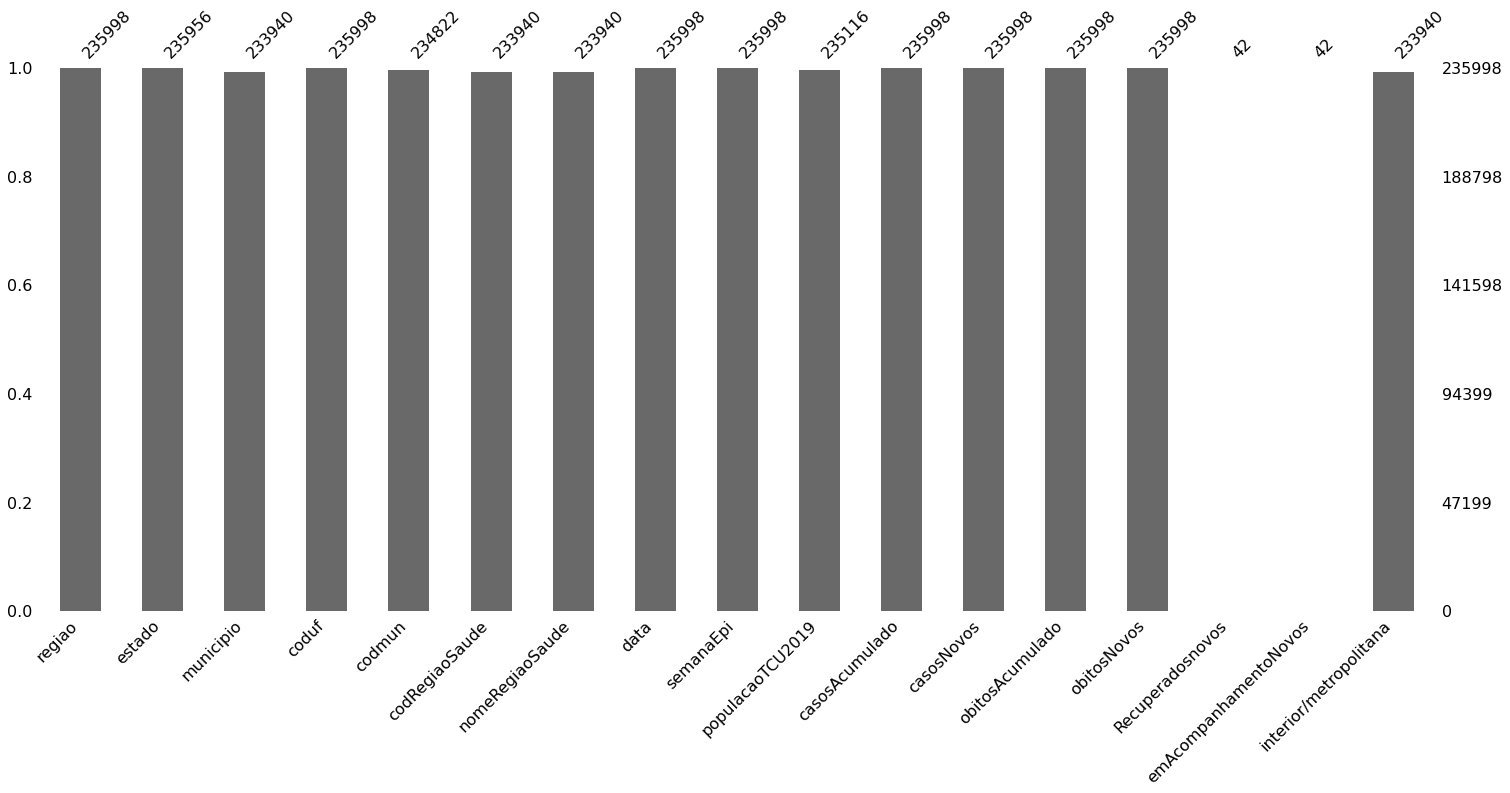

In [244]:
# visualizando dados nulos usando o missingno e gráfico de barras

msno.bar(df_sus_brazil);

In [245]:
# fazendo uma limpeza rápida de dados nulos das colunas irrelevantes para esta análise

df_sus_brazil.drop(['Recuperadosnovos', 'emAcompanhamentoNovos', 'coduf', 
                    'codmun', 'codRegiaoSaude', 'semanaEpi', 'nomeRegiaoSaude', 
                    'populacaoTCU2019', 'casosAcumulado', 'obitosAcumulado', 
                    'interior/metropolitana'], 
                     axis=1, inplace=True)

# Verificação após a limpeza

(df_sus_brazil.isnull().sum() / df_sus_brazil.shape[0]).sort_values(ascending=False)

municipio      0.008720
estado         0.000178
regiao         0.000000
data           0.000000
casosNovos     0.000000
obitosNovos    0.000000
dtype: float64

In [273]:
# vendo as alterações

df_sus_brazil.head()

,regiao,estado,municipio,data,casosNovos,obitosNovos
0,Brasil,NaN,NaN,2022-01-01,3986,49
1,Brasil,NaN,NaN,2022-01-02,1721,28
2,Brasil,NaN,NaN,2022-01-03,11850,76
3,Brasil,NaN,NaN,2022-01-04,18759,175
4,Brasil,NaN,NaN,2022-01-05,27267,129


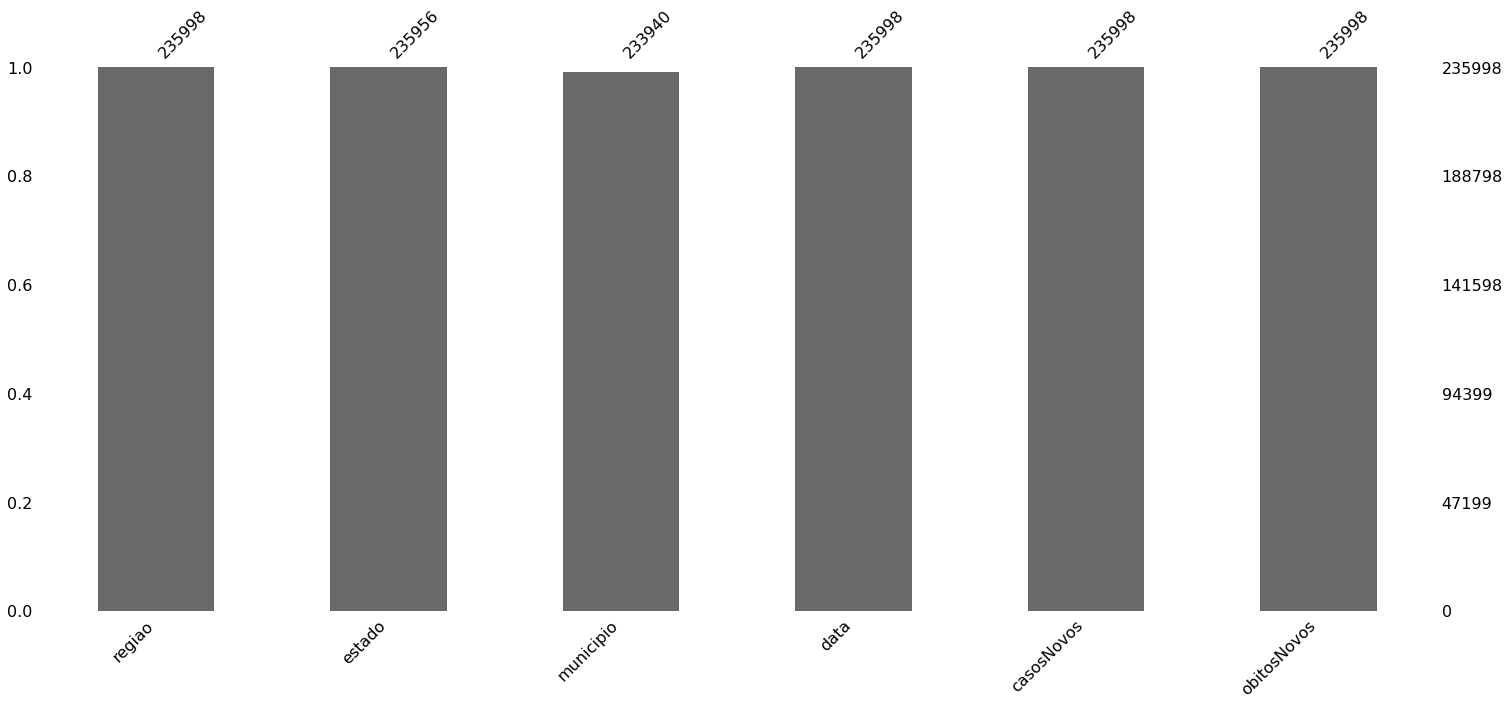

In [246]:
# visualização dos dados nulos após a limpeza

msno.bar(df_sus_brazil);

In [247]:
df_sus_brazil.estado

# os primeiros dados são sobre o brasil e depois dos estados e municípios

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
235993     DF
235994     DF
235995     DF
235996     DF
235997     DF
Name: estado, Length: 235998, dtype: object

In [275]:
# limpando os valores nulos correspondentes ao "brasil", na coluna estados

df_clean_sus_br = df_sus_brazil.dropna(subset=['estado'], axis=0).copy()

In [285]:
df_clean_sus_br.reset_index(drop=True, inplace=True)
df_clean_sus_br.head(5)

,regiao,estado,municipio,data,casosNovos,obitosNovos
0,Norte,RO,NaN,2022-01-01,34,3
1,Norte,RO,NaN,2022-01-02,32,2
2,Norte,RO,NaN,2022-01-03,91,3
3,Norte,RO,NaN,2022-01-04,254,3
4,Norte,RO,NaN,2022-01-05,232,3


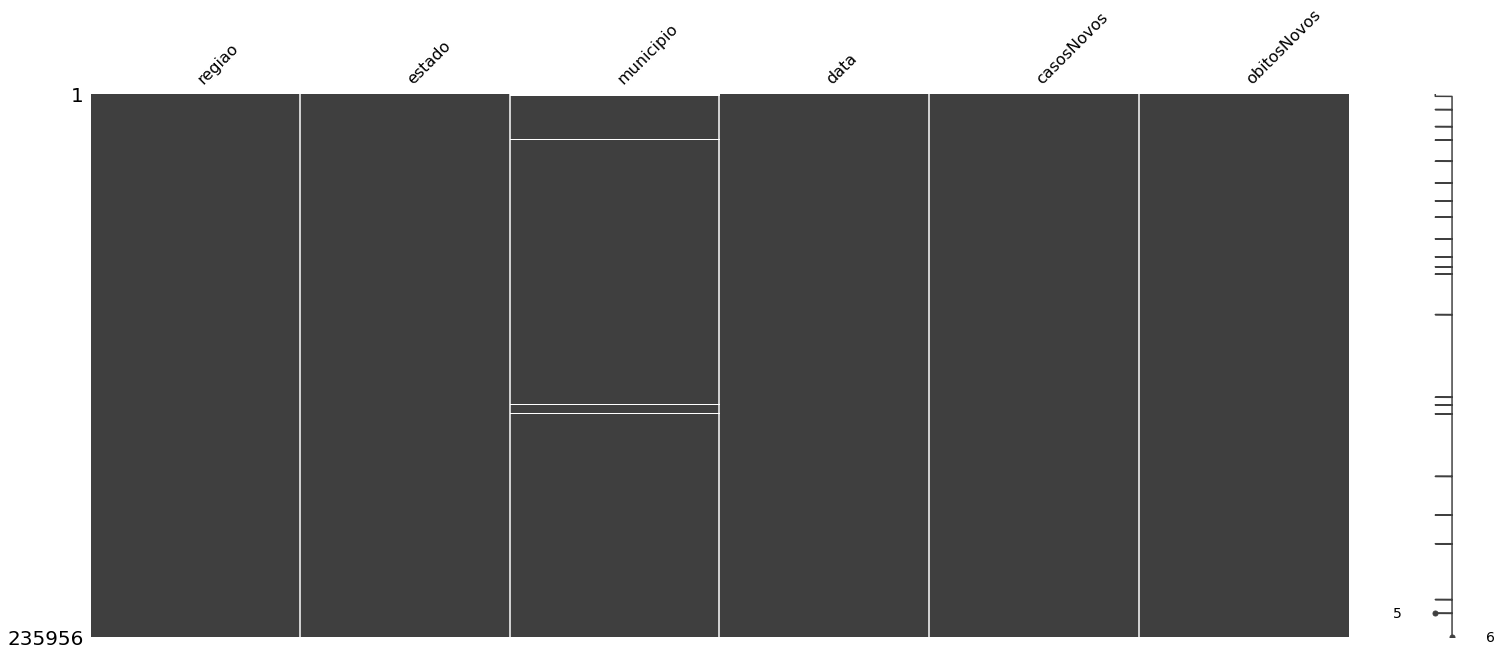

In [284]:
msno.matrix(df_clean_sus_br);

In [278]:
df_clean_sus_br.isnull().sum()

regiao            0
estado            0
municipio      2016
data              0
casosNovos        0
obitosNovos       0
dtype: int64

In [288]:
df_clean_sus_br.dropna(subset=['municipio'], axis=0, inplace=True)

In [308]:
df_clean_sus_br.reset_index(drop=True, inplace=True)
df_clean_sus_br.head(5)

,regiao,estado,municipio,data,casosNovos,obitosNovos
0,Norte,RO,Alta Floresta D'Oeste,2022-01-01,0,0
1,Norte,RO,Alta Floresta D'Oeste,2022-01-02,12,0
2,Norte,RO,Alta Floresta D'Oeste,2022-01-03,5,1
3,Norte,RO,Alta Floresta D'Oeste,2022-01-04,18,0
4,Norte,RO,Alta Floresta D'Oeste,2022-01-05,18,0


In [309]:
# criando um dataframe somente com o somatório dos dados de casos por cidade

group_br = df_clean_sus_br.groupby(['municipio'])['casosNovos'].sum()

df_group_br = pd.DataFrame(group_br)

df_group_br['municipio'] = df_group_br.index

df_group_br.reset_index(drop=True, inplace=True)

df_group_br.head()

,casosNovos,municipio
0,325,Abadia de Goiás
1,507,Abadia dos Dourados
2,132,Abadiânia
3,196,Abaetetuba
4,902,Abaeté


In [310]:
# vendo as 5 ultimas

df_group_br.tail()

,casosNovos,municipio
5292,136,Áurea
5293,313,Ângulo
5294,96,Érico Cardoso
5295,527,Óbidos
5296,0,Óleo


In [299]:
# verificando a quantidade de valores ausentes nas colunas

df_group_br.isnull().sum()

casosNovos    0
municipios    0
dtype: int64

In [311]:
# importando dados de latitude e longitude dos municipios

DATAPATH_lat_long_br = 'https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv'

df_lat_long_br = pd.read_csv(DATAPATH_lat_long_br)


# ver 5 primeiras entradas

df_lat_long_br.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo


In [312]:
# dataset limpo

df_lat_long_br.isnull().sum()

codigo_ibge     0
nome            0
latitude        0
longitude       0
capital         0
codigo_uf       0
siafi_id        0
ddd             0
fuso_horario    0
dtype: int64

In [303]:
df_lat_long_br.shape

(5570, 9)

In [313]:
# ver colunas

df_lat_long_br.columns

Index(['codigo_ibge', 'nome', 'latitude', 'longitude', 'capital', 'codigo_uf',
       'siafi_id', 'ddd', 'fuso_horario'],
      dtype='object')

In [314]:
# removendo colunas irrelevantes

df_clean_lat_long_br = df_lat_long_br.drop(['codigo_ibge', 'capital', 
                        'codigo_uf', 'siafi_id', 'ddd', 
                        'fuso_horario'], axis=1).copy()

In [315]:
# organizando o dataset

df_clean_lat_long_br.rename(columns={'nome': 'municipio'}, inplace=True)
df_clean_lat_long_br.head()

,municipio,latitude,longitude
0,Abadia de Goiás,-16.75730,-49.4412
1,Abadia dos Dourados,-18.48310,-47.3916
2,Abadiânia,-16.19700,-48.7057
3,Abaeté,-19.15510,-45.4444
4,Abaetetuba,-1.72183,-48.8788


In [317]:
# unindo os datasets de latitude e longitude

df_map_br_covid_cases = pd.merge(df_group_br, df_clean_lat_long_br, how = 'inner', on = 'municipio')

df_map_br_covid_cases.head()

,casosNovos,municipio,latitude,longitude
0,325,Abadia de Goiás,-16.75730,-49.4412
1,507,Abadia dos Dourados,-18.48310,-47.3916
2,132,Abadiânia,-16.19700,-48.7057
3,196,Abaetetuba,-1.72183,-48.8788
4,902,Abaeté,-19.15510,-45.4444


In [318]:
df_map_br_covid_cases.isnull().sum()

casosNovos    0
municipio     0
latitude      0
longitude     0
dtype: int64

In [319]:
df_map_br_covid_cases.shape

(5548, 4)

In [320]:
# visualização 3D 

!pip install keplergl -q

from keplergl import KeplerGl

In [323]:
# Display map

config= {
'version': 'v1',
'config': {
    'mapState': {
        'latitude':  -15.7801,
        'longitude': -47.9292,
        'zoom': 3.1
    }}}

map_covid_br = KeplerGl(height=100000, data={"data_1": df_map_br_covid_cases}, config=config)
map_covid_br.show()

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


<IPython.core.display.Javascript object>

## Conclusão

*Escreva suas conclusões e análises sobre os dados relativos à COVID-19...*